In [ ]:
import pandas as pd
from sklearn import preprocessing
from sklearn.metrics import pairwise
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import KMeans
import matplotlib.pylab as plt
import seaborn as sns
from pandas.plotting import parallel_coordinates

In [ ]:
uni_df = pd.read_csv('Universities.csv')

In [ ]:
uni_df.head()

,College Name,State,Public (1)/ Private (2),# appli. rec'd,# appl. accepted,# new stud. enrolled,% new stud. from top 10%,% new stud. from top 25%,# FT undergrad,# PT undergrad,in-state tuition,out-of-state tuition,room,board,add. fees,estim. book costs,estim. personal $,% fac. w/PHD,stud./fac. ratio,Graduation rate
0,Alaska Pacific University,AK,2,193.0,146.0,55.0,16.0,44.0,249.0,869.0,7560.0,7560.0,1620.0,2500.0,130.0,800.0,1500.0,76.0,11.9,15.0
1,University of Alaska at Fairbanks,AK,1,1852.0,1427.0,928.0,NaN,NaN,3885.0,4519.0,1742.0,5226.0,1800.0,1790.0,155.0,650.0,2304.0,67.0,10.0,NaN
2,University of Alaska Southeast,AK,1,146.0,117.0,89.0,4.0,24.0,492.0,1849.0,1742.0,5226.0,2514.0,2250.0,34.0,500.0,1162.0,39.0,9.5,39.0
3,University of Alaska at Anchorage,AK,1,2065.0,1598.0,1162.0,NaN,NaN,6209.0,10537.0,1742.0,5226.0,2600.0,2520.0,114.0,580.0,1260.0,48.0,13.7,NaN
4,Alabama Agri. & Mech. Univ.,AL,1,2817.0,1920.0,984.0,NaN,NaN,3958.0,305.0,1700.0,3400.0,1108.0,1442.0,155.0,500.0,850.0,53.0,14.3,40.0


In [ ]:
uni_df = uni_df.dropna()

In [ ]:
uni_df.head()

,College Name,State,Public (1)/ Private (2),# appli. rec'd,# appl. accepted,# new stud. enrolled,% new stud. from top 10%,% new stud. from top 25%,# FT undergrad,# PT undergrad,in-state tuition,out-of-state tuition,room,board,add. fees,estim. book costs,estim. personal $,% fac. w/PHD,stud./fac. ratio,Graduation rate
0,Alaska Pacific University,AK,2,193.0,146.0,55.0,16.0,44.0,249.0,869.0,7560.0,7560.0,1620.0,2500.0,130.0,800.0,1500.0,76.0,11.9,15.0
2,University of Alaska Southeast,AK,1,146.0,117.0,89.0,4.0,24.0,492.0,1849.0,1742.0,5226.0,2514.0,2250.0,34.0,500.0,1162.0,39.0,9.5,39.0
9,Birmingham-Southern College,AL,2,805.0,588.0,287.0,67.0,88.0,1376.0,207.0,11660.0,11660.0,2050.0,2430.0,120.0,400.0,900.0,74.0,14.0,72.0
11,Huntingdon College,AL,2,608.0,520.0,127.0,26.0,47.0,538.0,126.0,8080.0,8080.0,1380.0,2540.0,100.0,500.0,1100.0,63.0,11.4,44.0
21,Talladega College,AL,2,4414.0,1500.0,335.0,30.0,60.0,908.0,119.0,5666.0,5666.0,1424.0,1540.0,418.0,1000.0,1400.0,56.0,15.5,46.0


In [ ]:
uni_df_norm = uni_df[["# appli. rec'd", '# appl. accepted', '# new stud. enrolled','% new stud. from top 10%','% new stud. from top 25%','# FT undergrad','# PT undergrad','in-state tuition','out-of-state tuition','room','board','add. fees','estim. book costs','estim. personal $','% fac. w/PHD','stud./fac. ratio','Graduation rate']].apply(preprocessing.scale, axis=0)

In [ ]:
uni_df_norm

,# appli. rec'd,# appl. accepted,# new stud. enrolled,% new stud. from top 10%,% new stud. from top 25%,# FT undergrad,# PT undergrad,in-state tuition,out-of-state tuition,room,board,add. fees,estim. book costs,estim. personal $,% fac. w/PHD,stud./fac. ratio,Graduation rate
0,-0.726085,-0.766447,-0.793414,-0.650759,-0.573903,-0.710495,0.046333,-0.335086,-0.700046,-0.843743,0.667644,-0.700526,1.541090,0.276102,0.167704,-0.529598,-2.789257
2,-0.737636,-0.778042,-0.756242,-1.300829,-1.558991,-0.658397,0.680985,-1.390805,-1.241943,0.411116,0.226150,-0.970586,-0.299262,-0.220137,-2.054792,-1.145818,-1.465311
9,-0.575673,-0.589724,-0.539768,2.112035,1.593292,-0.468871,-0.382380,0.408890,0.251873,-0.240175,0.544026,-0.728658,-0.912713,-0.604796,0.047569,0.009594,0.355113
11,-0.624090,-0.616912,-0.714697,-0.109035,-0.426140,-0.648535,-0.434836,-0.240728,-0.579315,-1.180618,0.738283,-0.784920,-0.299262,-0.311163,-0.613173,-0.657977,-1.189489
21,0.311318,-0.225084,-0.487290,0.107655,0.214168,-0.569208,-0.439369,-0.678766,-1.139785,-1.118857,-1.027693,0.109652,2.767992,0.129286,-1.033645,0.394732,-1.079161
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1274,0.634509,0.982388,1.286045,-0.434070,-0.179868,1.061916,0.302137,-1.306246,-0.830992,-0.920943,-1.734084,1.943806,-1.654989,-0.076257,0.407974,1.370413,-0.251695
1283,-0.736162,-0.773644,-0.771548,-0.596587,-0.721666,-0.703420,-0.502187,-0.055641,-0.342496,-0.591087,-0.391942,-0.813051,-0.299262,0.129286,-1.514185,-1.402576,-0.858503
1284,-0.630480,-0.625708,-0.665498,-0.379897,-0.573903,-0.592577,-0.465921,0.192593,-0.024880,-0.908311,-0.557944,-0.807425,0.682259,0.716551,-1.994724,-0.632301,-0.748174
1291,0.265113,0.640938,1.340710,-0.759104,0.214168,0.887612,0.998310,-1.405684,-1.272590,-0.268248,-0.250664,-0.137903,0.927639,0.364192,0.227772,0.677166,-0.858503


{'color_list': ['g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',

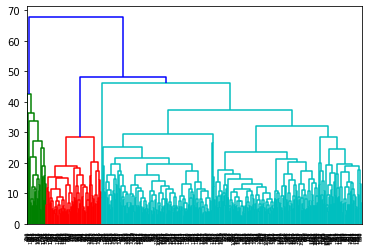

In [ ]:
Z = linkage(uni_df_norm, method='complete', metric='cityblock')
dendrogram(Z, labels=uni_df_norm.index)

In [ ]:
# Q2: Looking at the dendrogram alone, it seems that the data could easily be divided up into at least 4 main clusters, perhaps even 5.
# I think it's safe to say that the analysis will change if Euclidean distance is used as well. 
# This is because Manhattan distance, as the sum of absolute differences, is affected more by large differences in individual measurements.
# Euclidean distance, however, as the square root of the sum of squared differences, is less affected by large differences in individual measurements and seems to look at differences between all measurements as a whole.

In [ ]:
memb = fcluster(linkage(uni_df_norm, method='complete', metric='cityblock'), 6, criterion='maxclust')
centroids = {}
for key, item in uni_df_norm.groupby(memb):
    centroids[key] = item.mean()
    print('Cluster {}: size {}'.format(key, len(item)))
pd.DataFrame(centroids).transpose().round(2)

Cluster 1: size 26
Cluster 2: size 1
Cluster 3: size 78
Cluster 4: size 159
Cluster 5: size 206
Cluster 6: size 1


,# appli. rec'd,# appl. accepted,# new stud. enrolled,% new stud. from top 10%,% new stud. from top 25%,# FT undergrad,# PT undergrad,in-state tuition,out-of-state tuition,room,board,add. fees,estim. book costs,estim. personal $,% fac. w/PHD,stud./fac. ratio,Graduation rate
1,2.36,2.73,2.93,0.24,0.42,2.89,1.86,-1.00,-0.31,0.00,0.02,0.83,0.07,0.64,0.79,0.59,0.08
2,11.05,9.70,4.09,0.43,1.15,3.82,1.89,-1.05,-0.73,0.78,-0.24,1.76,0.87,1.02,1.01,1.42,0.63
3,0.36,0.13,-0.03,1.49,1.34,-0.12,-0.37,1.48,1.62,1.04,0.98,-0.05,0.31,-0.45,1.01,-0.99,1.03
4,-0.40,-0.37,-0.43,0.01,0.09,-0.43,-0.28,0.38,0.25,0.05,0.30,-0.14,-0.13,-0.11,0.00,-0.19,0.30
5,-0.18,-0.16,-0.05,-0.60,-0.63,0.00,0.11,-0.73,-0.77,-0.45,-0.61,0.01,-0.08,0.18,-0.47,0.45,-0.63
6,-0.63,-0.67,-0.63,-1.46,-1.76,-0.65,-0.31,0.33,0.15,2.28,1.20,-0.70,10.99,-1.02,-3.92,-1.84,-1.02


In [ ]:
# Q3: For the purposes of this assigment, I split the records into 6 clusters, 2 of which are less clusters and could be called 'outliers'. This leaves us with four main clusters.
# The first has a higher number of new students enrolled and lower in-state tuition compared to other clusters, in addition to fairly high estimated personal costs compared to other clusters.
# The second cluster (not counting the outlier in the second row) has higher percentages of students from top 10% and 25% than other clusters, as well as higher in-state and out-of-state tuition. In addition, there was a higher % of faculty with a PHD as well as a lower student/faculty ratio and a higher graduation rate.
# The third cluster had lower values for applications recorded, applications accepted, number of new students enrolled, and number of full-time undergrad compared to other clusters.
# The fourth cluster had lower numbers of new students enrolled, in addition to lower percents of students from top 10% and 25%, lower room and board costs, lower % of faculty with a PHD, and a lower graduation rate than other clusters.
# Rows 2 and 6 in the above dataframe were ignored in the analysis due to being outliers.

In [25]:
uni_state_df = uni_df['State']

In [31]:
for key, item in uni_state_df.groupby(memb):
    centroids[key] = item.value_counts()
    print('Cluster {}: size {}'.format(key, len(item)))
pd.DataFrame(centroids)

Cluster 1: size 26
Cluster 2: size 1
Cluster 3: size 78
Cluster 4: size 159
Cluster 5: size 206
Cluster 6: size 1


,1,2,3,4,5,6
AK,NaN,NaN,NaN,NaN,2.0,NaN
AL,NaN,NaN,NaN,3.0,1.0,NaN
AR,NaN,NaN,NaN,2.0,2.0,NaN
AZ,1.0,NaN,NaN,NaN,1.0,NaN
CA,NaN,NaN,9.0,4.0,2.0,NaN
CO,NaN,NaN,1.0,NaN,5.0,NaN
CT,1.0,NaN,3.0,4.0,2.0,NaN
DC,NaN,NaN,2.0,2.0,NaN,NaN
DE,1.0,NaN,NaN,NaN,1.0,NaN
FL,NaN,NaN,2.0,3.0,3.0,NaN


In [29]:
uni_pp_df = uni_df['Public (1)/ Private (2)']

In [30]:
for key, item in uni_pp_df.groupby(memb):
    centroids[key] = item.value_counts()
    print('Cluster {}: size {}'.format(key, len(item)))
pd.DataFrame(centroids).transpose()

Cluster 1: size 26
Cluster 2: size 1
Cluster 3: size 78
Cluster 4: size 159
Cluster 5: size 206
Cluster 6: size 1


,1,2
1,23.0,3.0
2,1.0,NaN
3,NaN,78.0
4,5.0,154.0
5,99.0,107.0
6,NaN,1.0


In [32]:
# Q4: In terms of categorical variables, the first cluster seemed to be comprised mostly of public schools.
# The second cluster seems to be comprised completely of private schools. In addition, it accounted for a large portion of the schools in California and Massachussets.
# The third cluster was also comprised almost completely of private schools. It accounted for a large proportion of schools from Indiana, Pennsylvania, and Virginia. 
# The fourth cluster seemed to be a pretty even mix between public and private schools. Perhaps this suggests that the cluster itself could be divided into other clusters as well. 
# In any case, the fourth cluster accounted for a large proportion of schools from Vermont, Texas, Tennessee, Missouri, Colorado, and all of the schools from Oklahoma!

In [33]:
# Q5 In addition, some factors could affect the forming of these clusters, including things like what programs each school offers, how conveniently the school is situated, the school's 'prestige', average student GPA, etc.